## 在数据中查找峰值
文件 spots_num.mat 包含从 1749 年到 2012 年每年观测到的太阳黑子的平均数量。
这些数据可以从美国国家航空航天局获得。
求出最大值及其出现的年份。将它们与数据一起绘制出来。

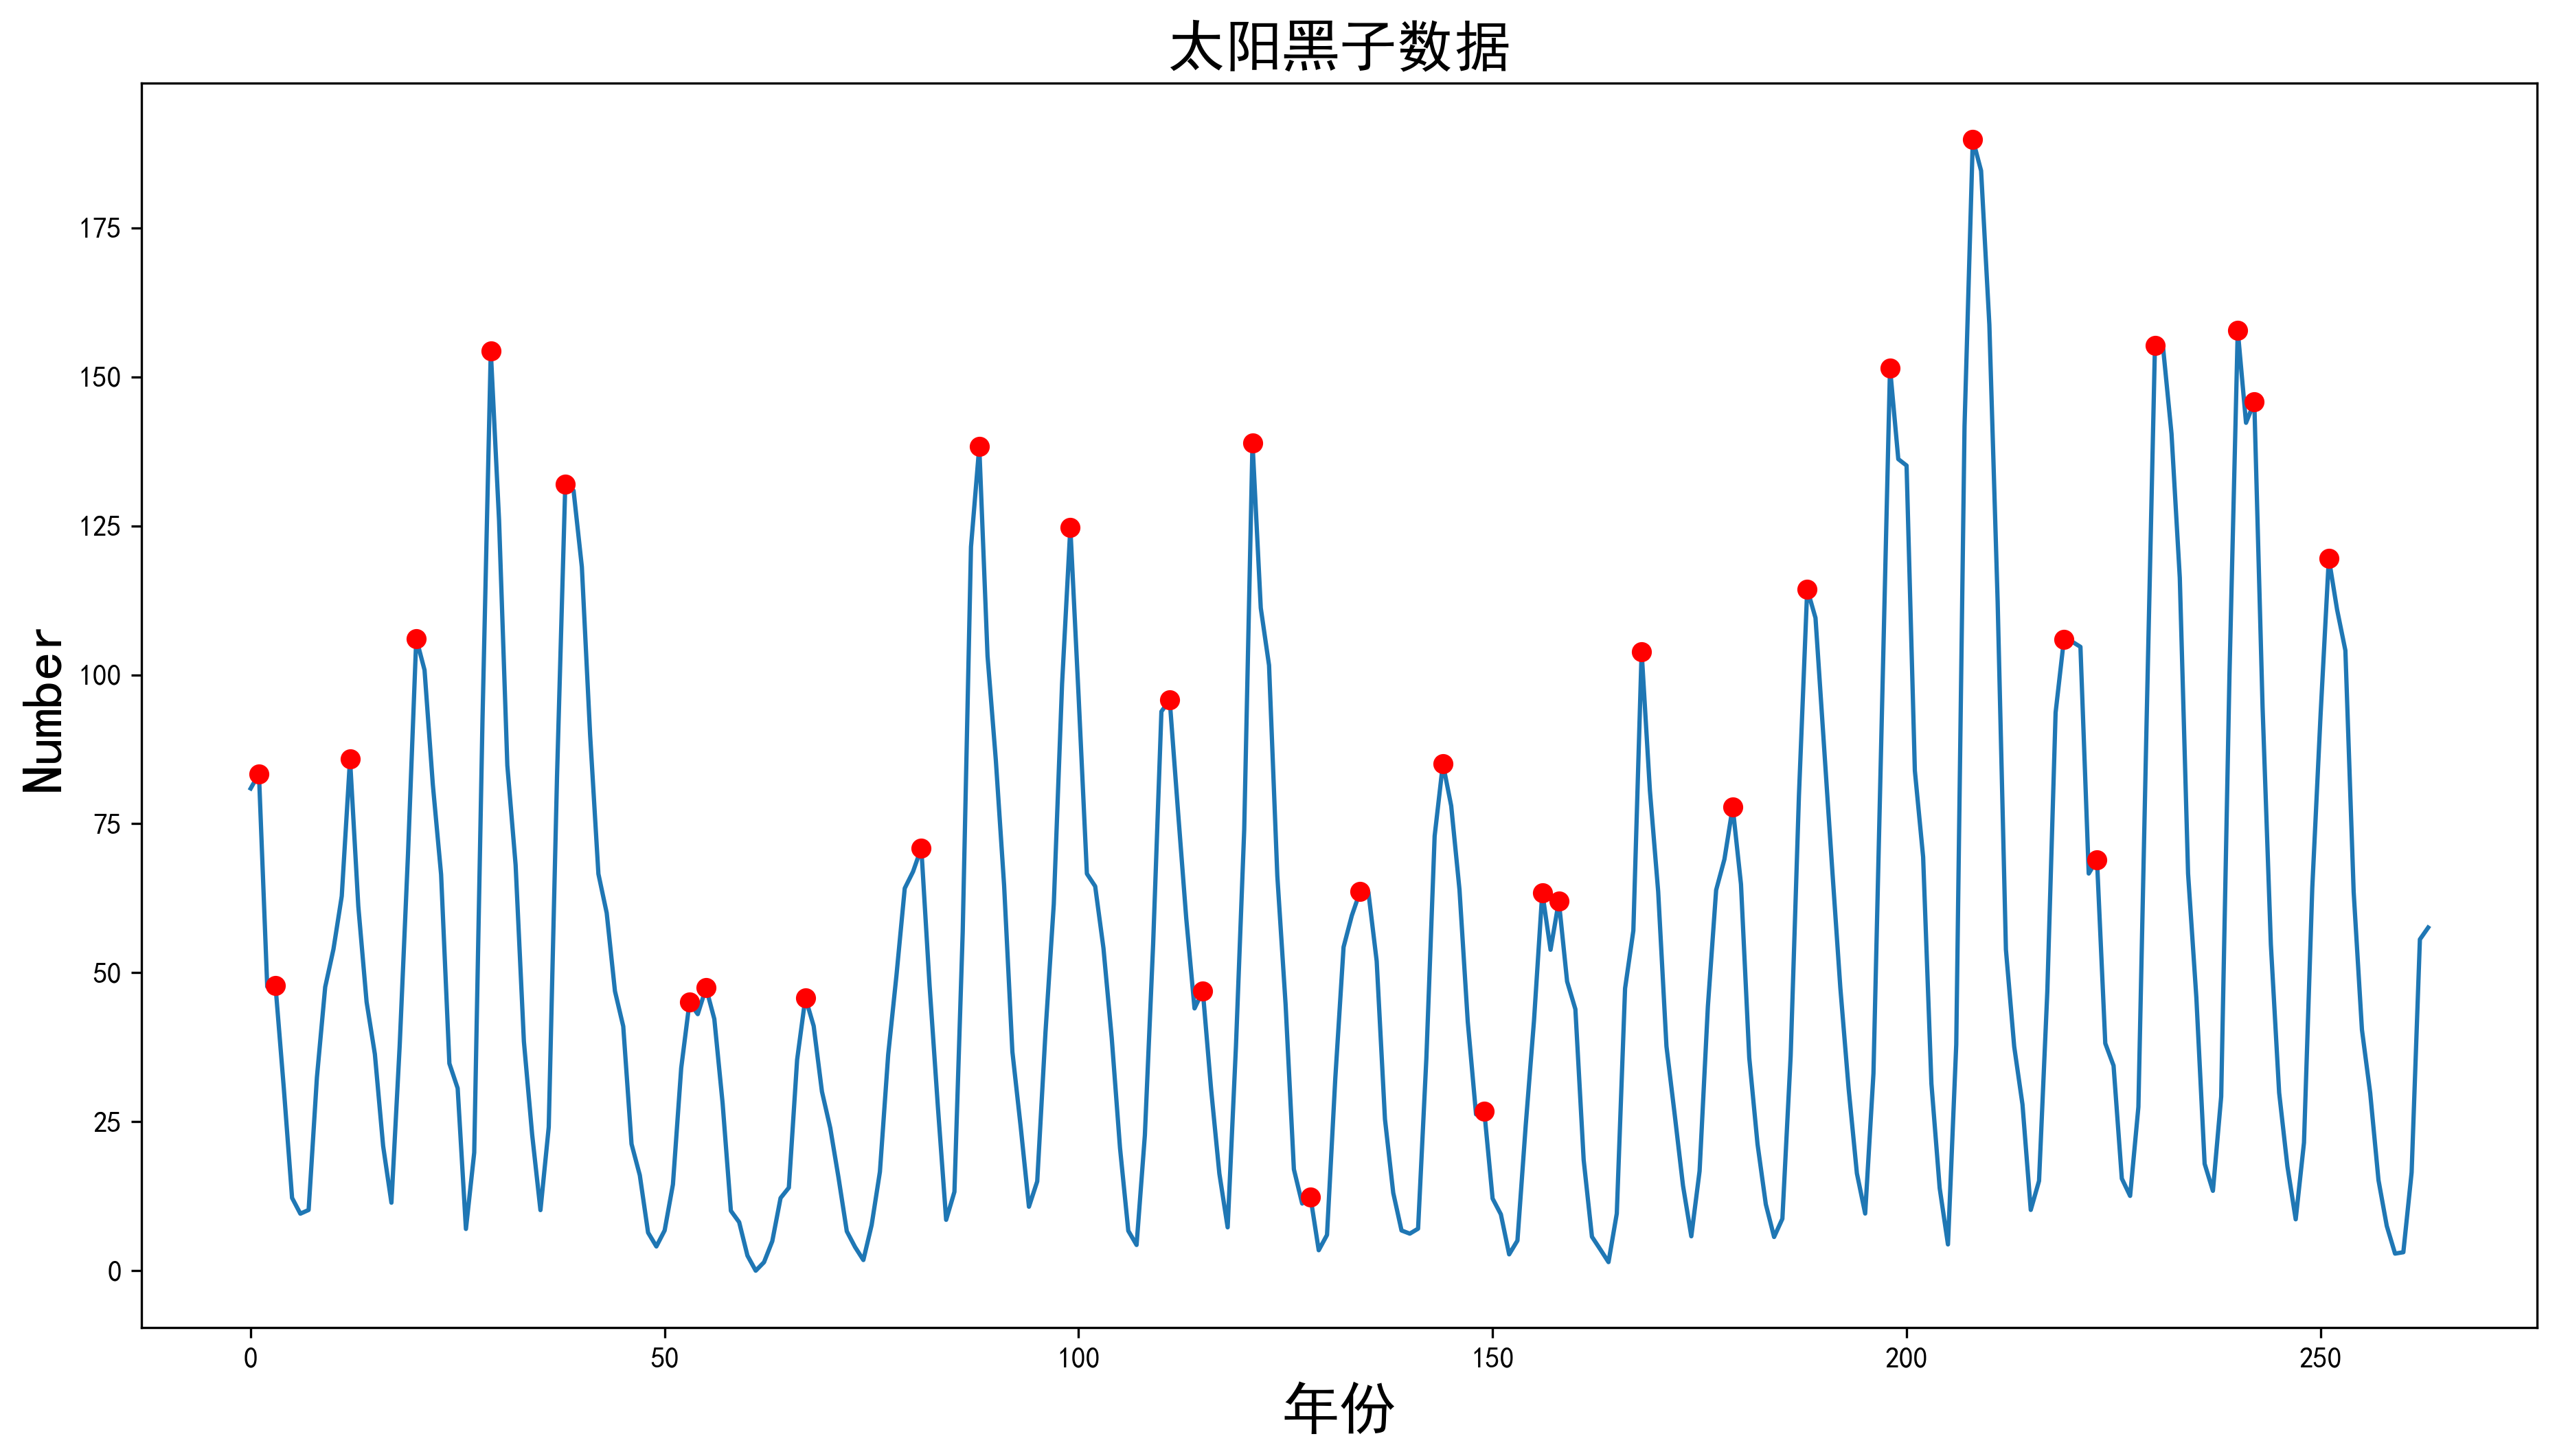

In [9]:
import scipy.io as sio
import numpy as np
import matplotlib as mpl
from numpy import ndarray
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  #用来正常显示中文标签
#读入
data = sio.loadmat('spots_num.mat')
year = data['year']
avSpots = data['avSpots']
avSpots = avSpots.squeeze()
peaks,_ =find_peaks(avSpots)
plt.figure(figsize=(15,8),dpi=300)
plt.plot(avSpots)
plt.plot(peaks,avSpots[peaks],"or")
plt.xlabel('年份',fontsize=20)
plt.ylabel('Number',fontsize=20)
plt.title('太阳黑子数据',fontsize=20)
plt.show()

一些峰值彼此非常接近。有些峰值不会周期性重复出现。每 50 年大约有五个这样的峰值。

为了更好地估计周期持续时间
再次使用 find_peaks，这次将峰间间隔限制为至少六年。

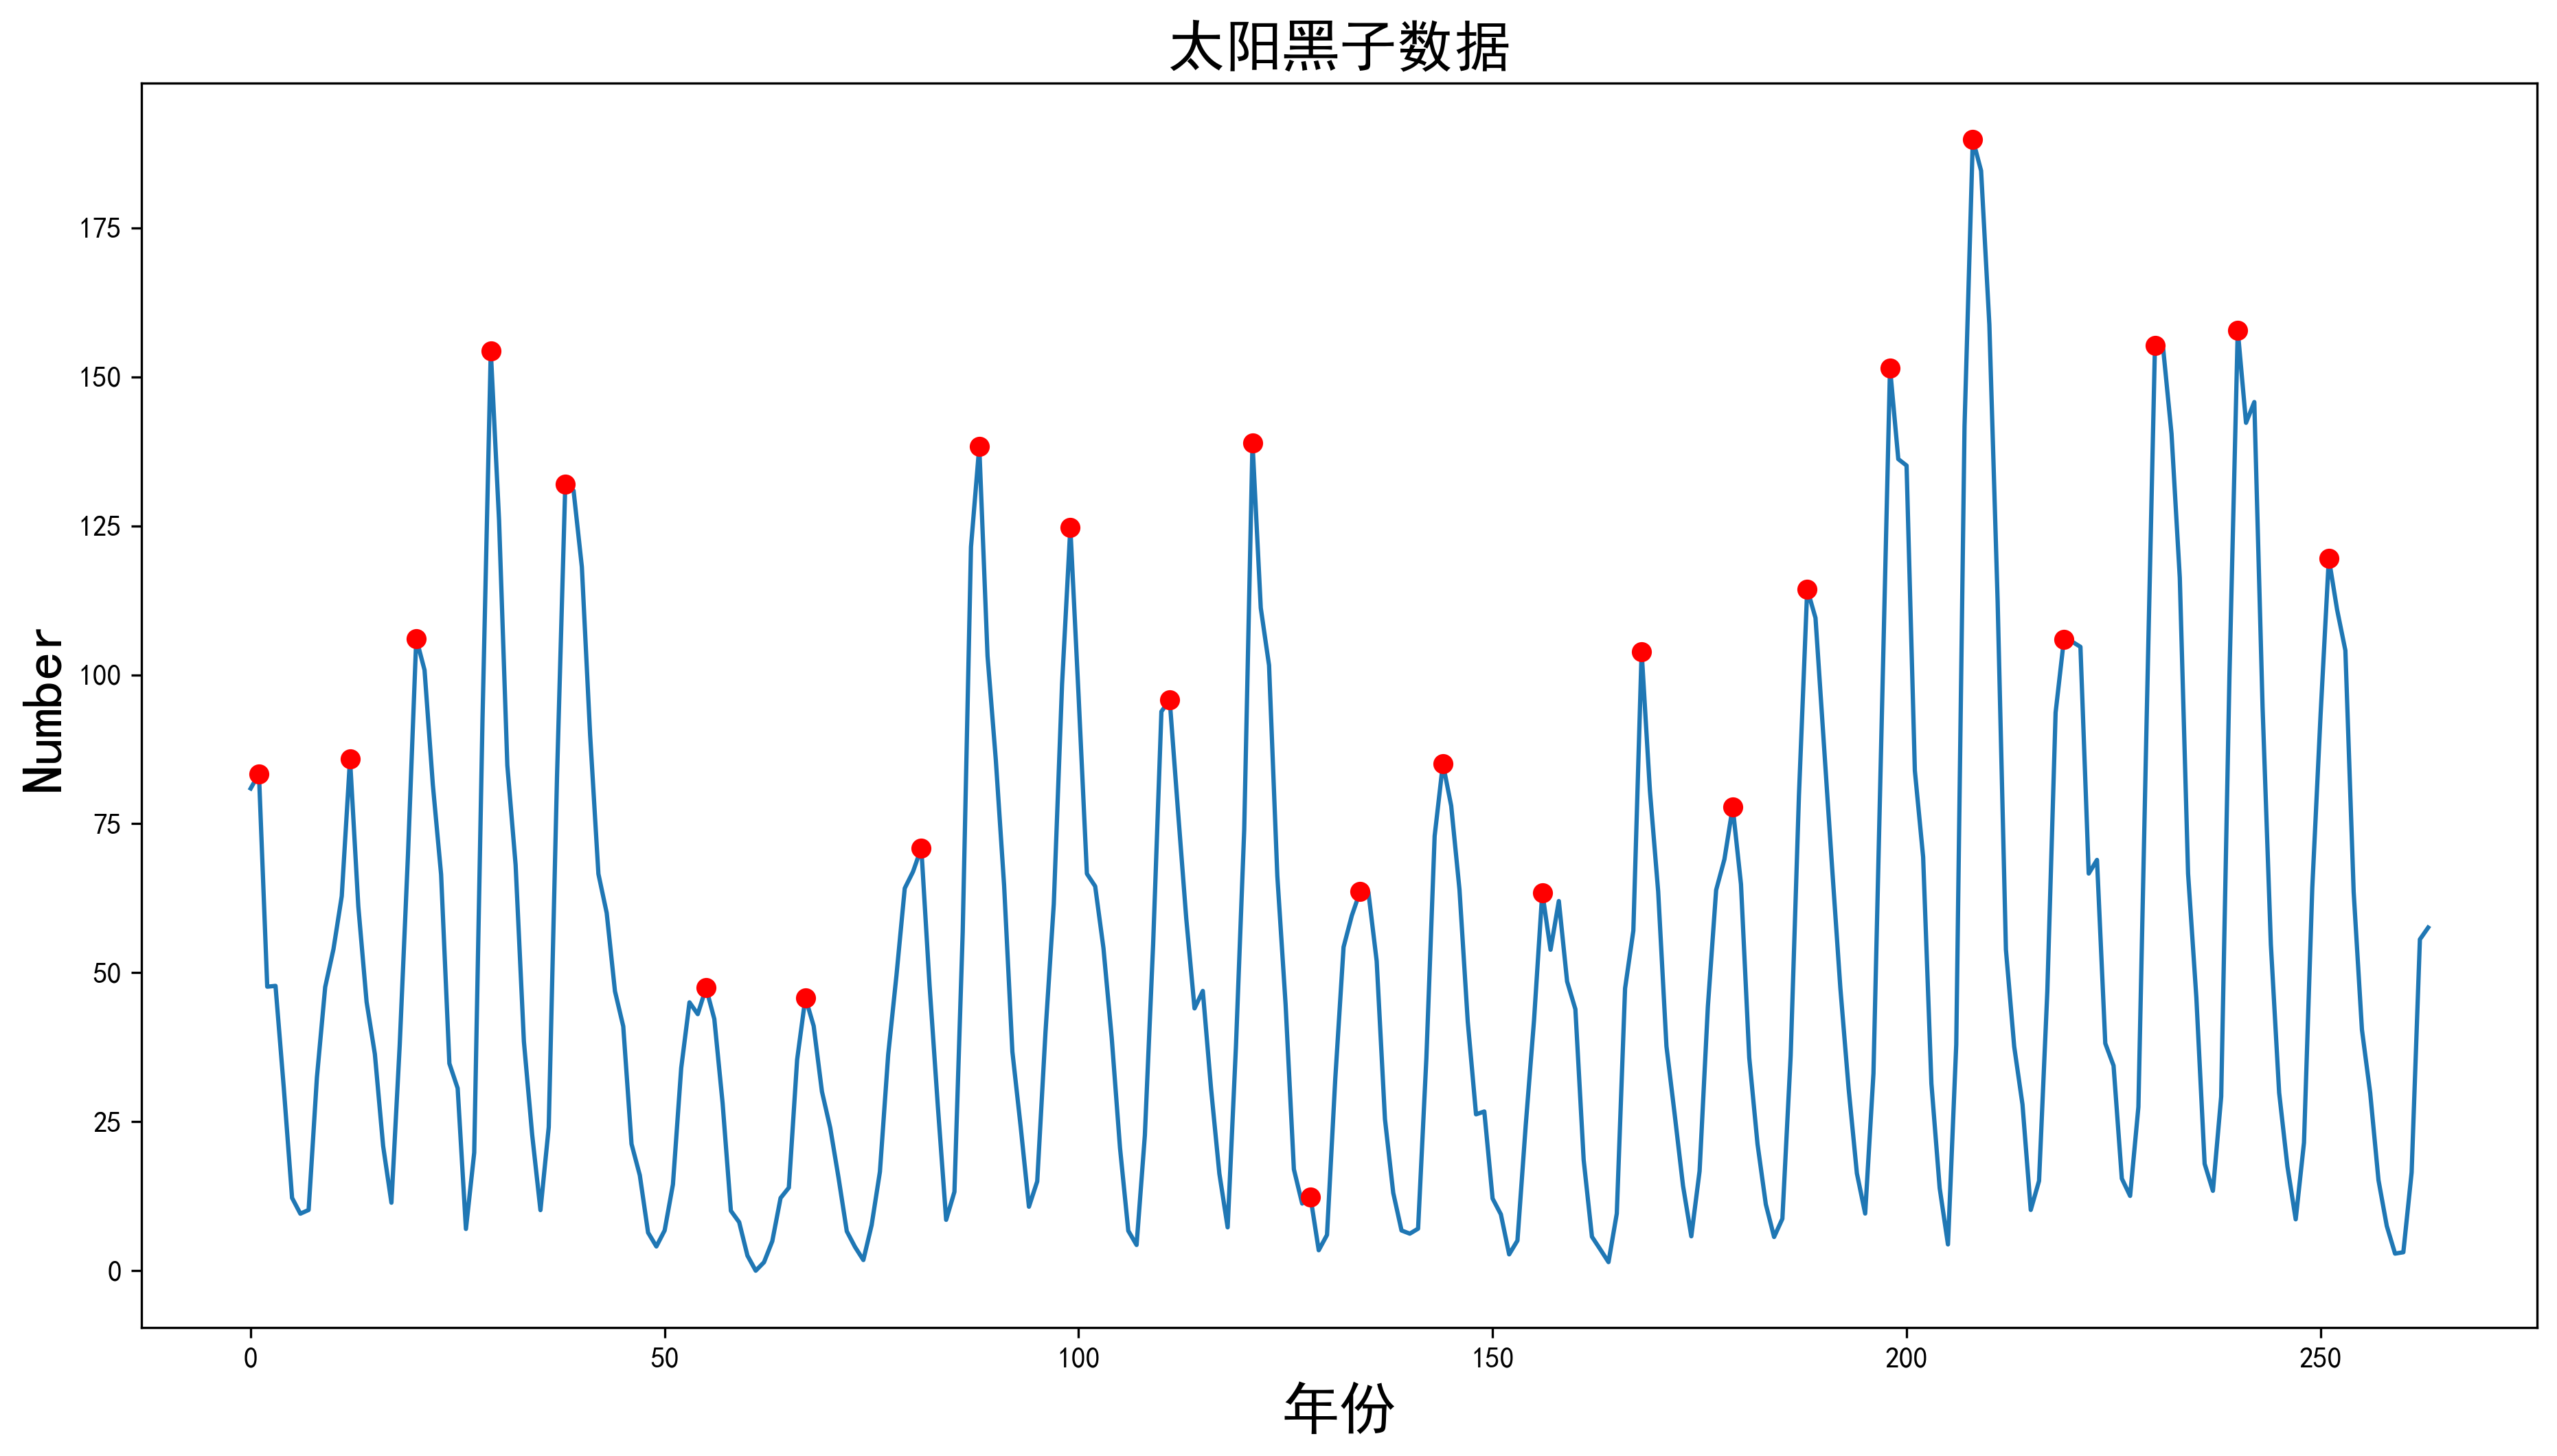

In [10]:
peaks,_ =find_peaks(avSpots,distance=6)
plt.figure(figsize=(15,8),dpi=300)
plt.plot(avSpots)
plt.plot(peaks,avSpots[peaks],"or")
plt.xlabel('年份',fontsize=20)
plt.ylabel('Number',fontsize=20)
plt.title('太阳黑子数据',fontsize=20)
plt.show()

峰值高度低于40的都不考虑

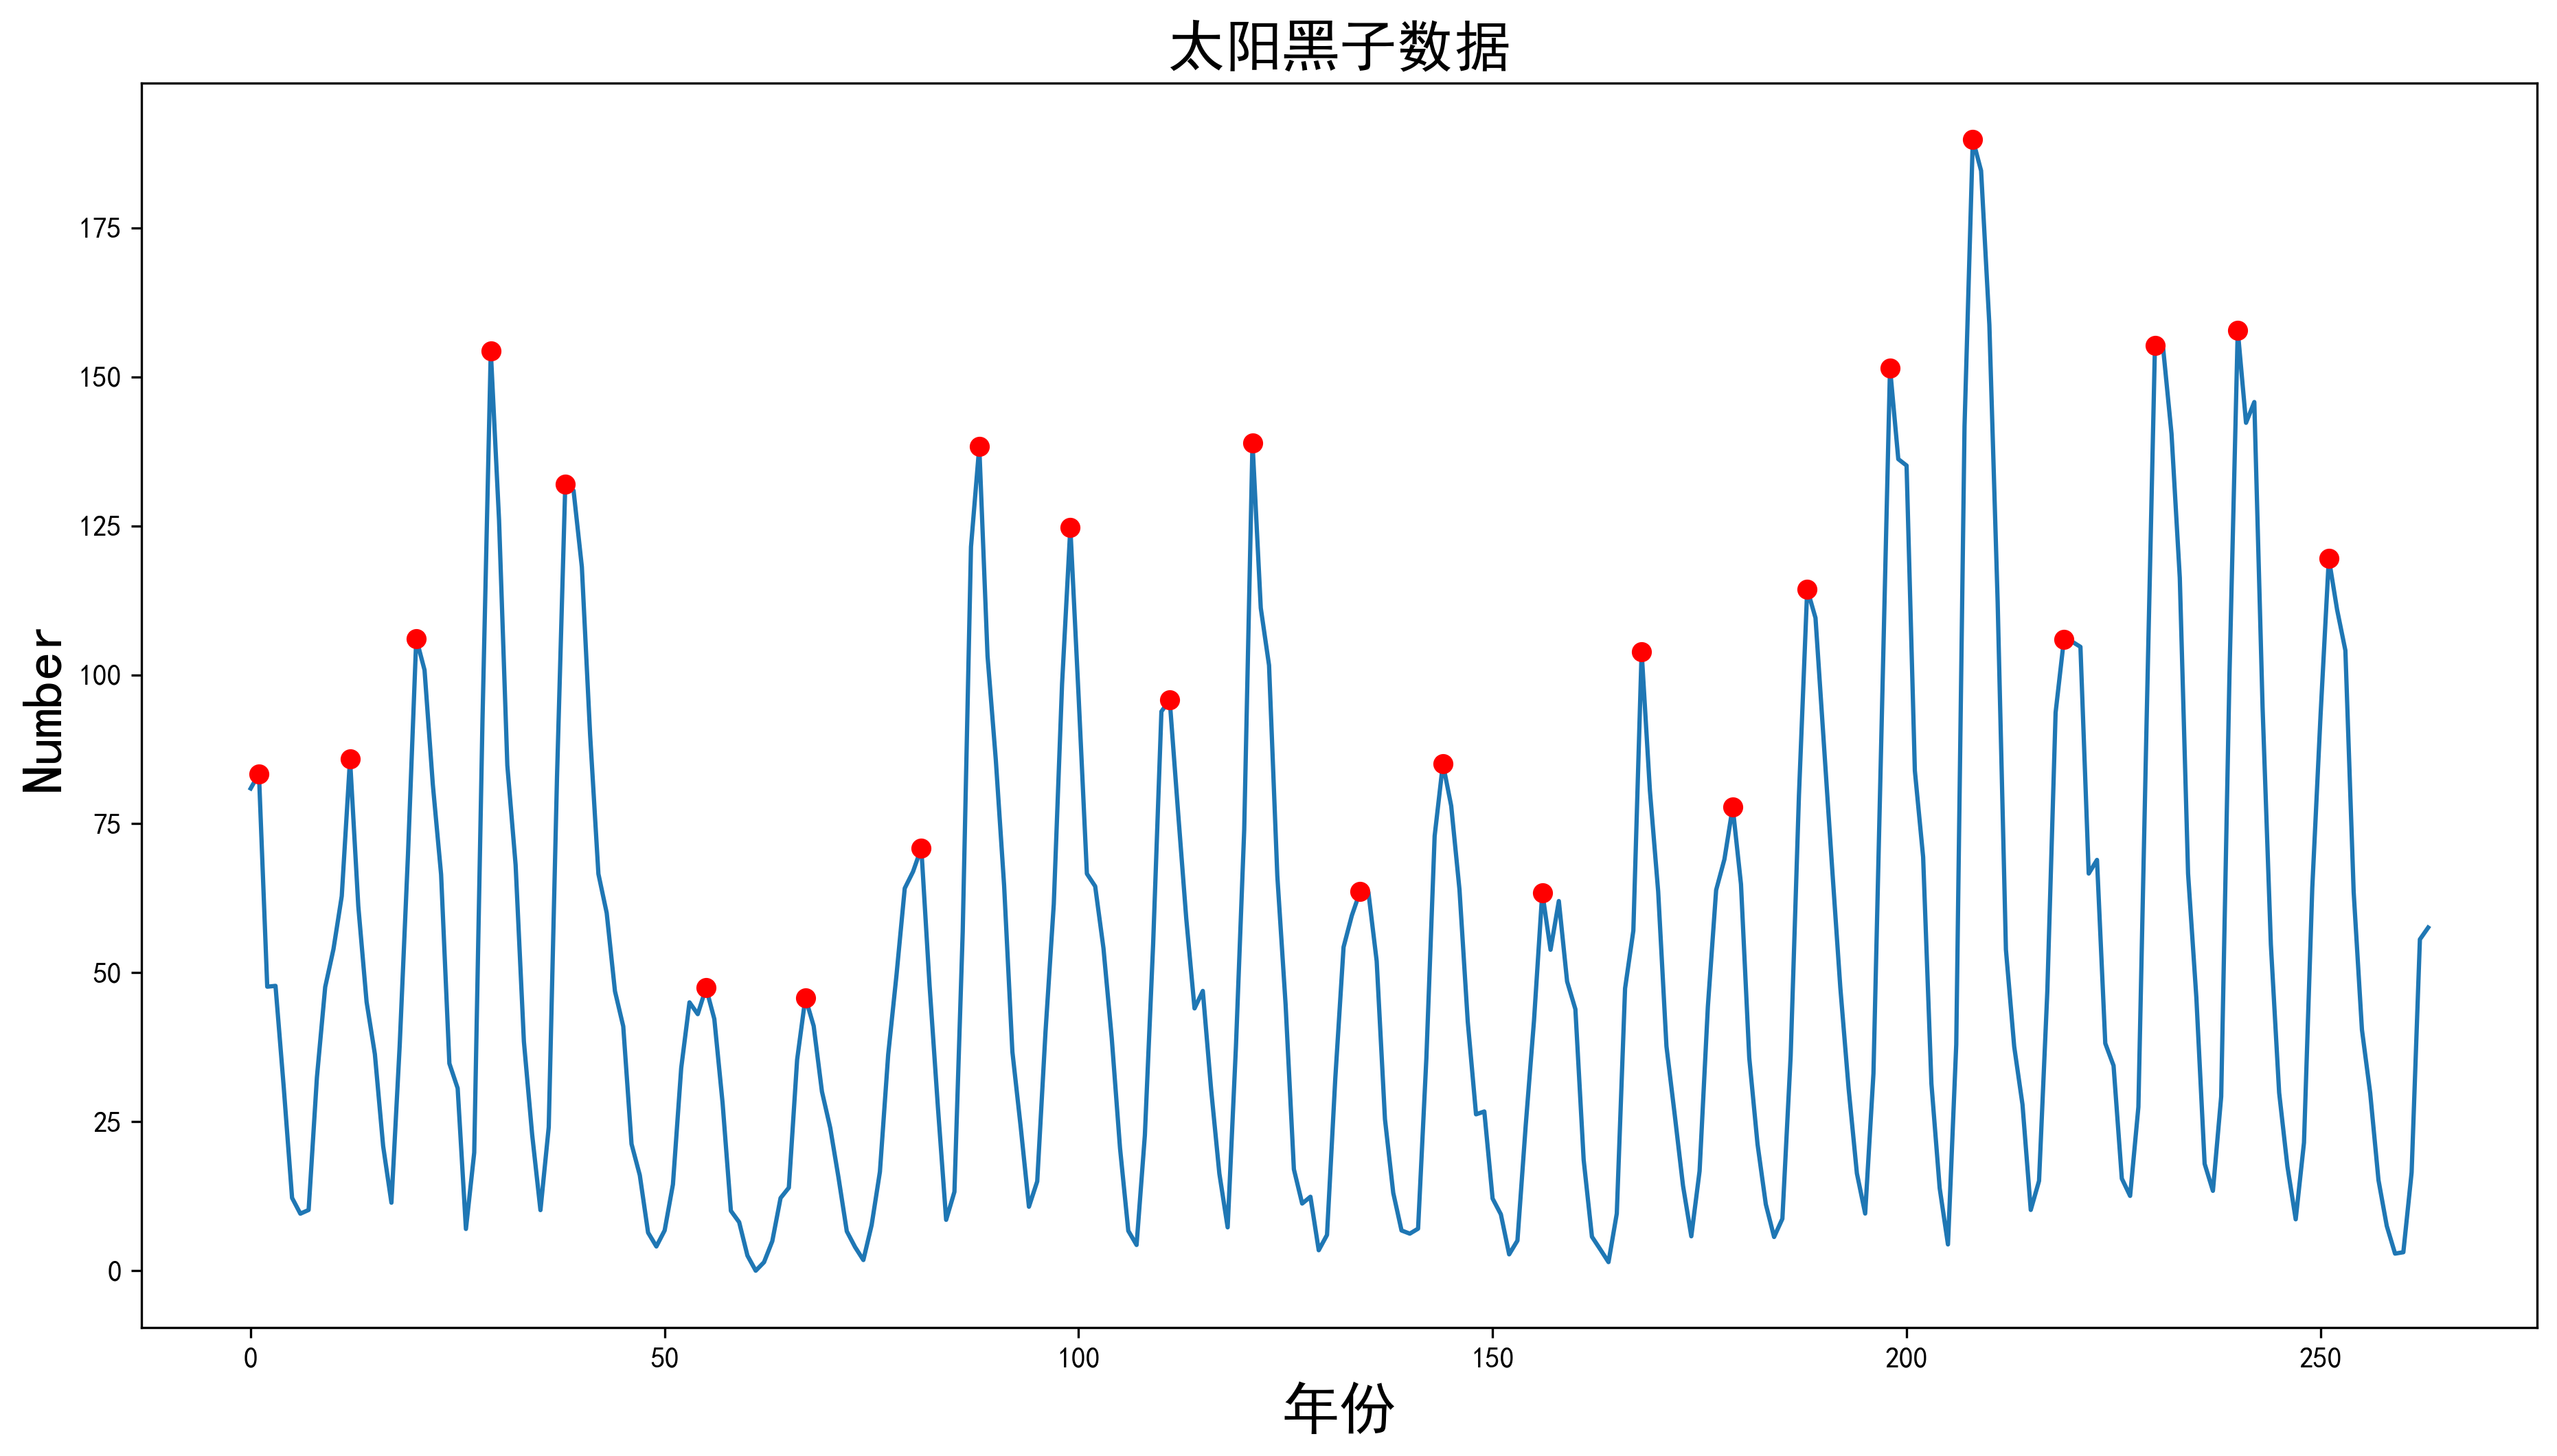

In [8]:
peaks,_ =find_peaks(avSpots,height=40,distance=6)
plt.figure(figsize=(15,8),dpi=300)
plt.plot(avSpots)
plt.plot(peaks,avSpots[peaks],"or")
plt.xlabel('年份',fontsize=20)
plt.ylabel('Number',fontsize=20)
plt.title('太阳黑子数据',fontsize=20)
plt.show()